In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/kaggle/input/movie-predict/data/data_unnoise.csv")

In [3]:
# Hàm tính sai số tuyệt đối trung bình MAE
def sai_so_MAE(real, pred):
    sum = 0
    leng = len(real)
    for i in range(leng):
        sum += np.absolute(real[i] - pred[i])
    return sum / leng

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
np.random.seed(31) # const 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # X_train = 80% X

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
rf_model = regressor.fit(X_train, y_train)

In [7]:
y_predict = regressor.predict(X_test)

In [8]:
regressor.score(X_test, y_test)

0.8032538026525833

In [9]:
y_real = y_test.values
print(f'sai so mae: {sai_so_MAE(y_real, y_predict)} $')

sai so mae: 38281655.07042792 $


In [10]:
index = np.arange(0, 1075, 1, dtype=None)

In [11]:
# tạo data frame cho y_predict
data_pred = {'index': index,
        'revenue_predict': y_predict
       }
df_pred = pd.DataFrame(data_pred)

In [12]:
# tạo data frame cho y_test
data_real = {'index': index,
        'revenue_test': y_real
       }
df_real = pd.DataFrame(data_real)

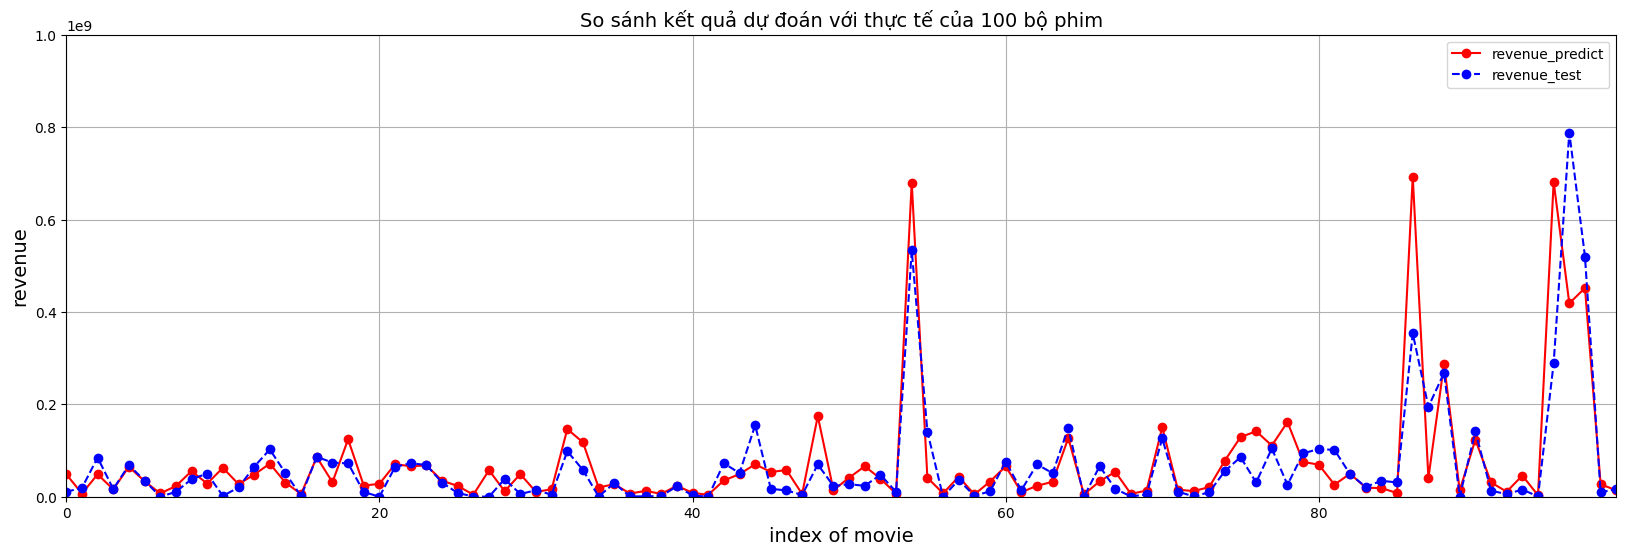

In [13]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)

plt.plot(df_pred['index'], df_pred['revenue_predict'], color='red', label="revenue_predict", marker='o') # marker='o'
plt.plot(df_real['index'], df_real['revenue_test'], color='blue', label="revenue_test", linestyle="dashed", marker='o') # linestyle="dashed": nét đứt

plt.title('So sánh kết quả dự đoán với thực tế của 100 bộ phim', fontsize=14)
plt.xlabel('index of movie', fontsize=14)
plt.ylabel('revenue', fontsize=14)

plt.xlim([0, 99]) # so sánh 100 phim đầu tiên
plt.ylim([0,1000000000])

plt.legend(); # hiển thị label

plt.grid(True)
plt.show()